In this notebook , we will explore the concept of a "perfect" or "optimal" solution to a problem
We will use the following Python libraries:

In [209]:
import numpy as np
import keras
import tensorflow as tf
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Input,Dropout,BatchNormalization
from keras.models import Sequential
from keras.preprocessing import image_dataset_from_directory
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.utils import plot_model
import cv2
from keras.regularizers import l2
import matplotlib.pyplot  as plt

here we selecting the path images folder in the directory

In [210]:
train_path="Training"
valid_path="Validation"

here using he image-dataset from directory method we resize the image and converet the image into gray

In [211]:
train_data=image_dataset_from_directory(
    train_path,
    batch_size=60,
    label_mode="categorical",
    image_size=(60,60),
    shuffle=True,
    color_mode='grayscale'
)

Found 1992 files belonging to 2 classes.


In [212]:
test_data=image_dataset_from_directory(
    valid_path,
    batch_size=60,
    label_mode="categorical",
    image_size=(60,60),
    shuffle=True,
    color_mode='grayscale'
)

Found 719 files belonging to 2 classes.


In [213]:
classes=train_data.class_names

Here we build the cnn model.  We use the Sequential API to define the model. We add two convolutional layers with max pooling,
then two dense layers.  We use the ReLU activation function for the convolutional and dense
layers and the softmax activation function for the output layer.

In [220]:
model=Sequential([
    Input((60,60,1)),
    Conv2D(filters=32,kernel_size=(3,3),activation="relu",kernel_regularizer=l2(0.001)),
    Conv2D(filters=64,kernel_size=(3,3),activation="relu",kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.5),
    Conv2D(filters=256,kernel_size=(3,3),activation="relu",kernel_regularizer=l2(0.001)),
    Conv2D(filters=256,kernel_size=(3,3),activation="relu",kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.5),
    Flatten(),
    Dense(1000,activation="relu",kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(len(classes),activation="sigmoid",kernel_regularizer=l2(0.001))
])

here we compile the model  and the data


In [221]:
model.compile(loss=keras.losses.binary_crossentropy,optimizer=keras.optimizers.Adam(0.001),metrics=["accuracy"])

here we print the summary of the model 

In [222]:
model.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_71 (Conv2D)              │ (None, 58, 58, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_72 (Conv2D)              │ (None, 56, 56, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_36 (MaxPooling2D) │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_54 (Dropout)            │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_73 (Conv2D)              │ (None, 26, 26, 256)    │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_74 (Conv2D)              │ (None, 24, 24, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 24, 24, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_37 (MaxPooling2D) │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_55 (Dropout)            │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_18 (Flatten)            │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 1000)           │    36,865,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_56 (Dropout)            │ (None, 1000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 2)              │         2,002 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,624,890 (143.53 MB)

 Trainable params: 37,624,250 (143.53 MB)

 Non-trainable params: 640 (2.50 KB)

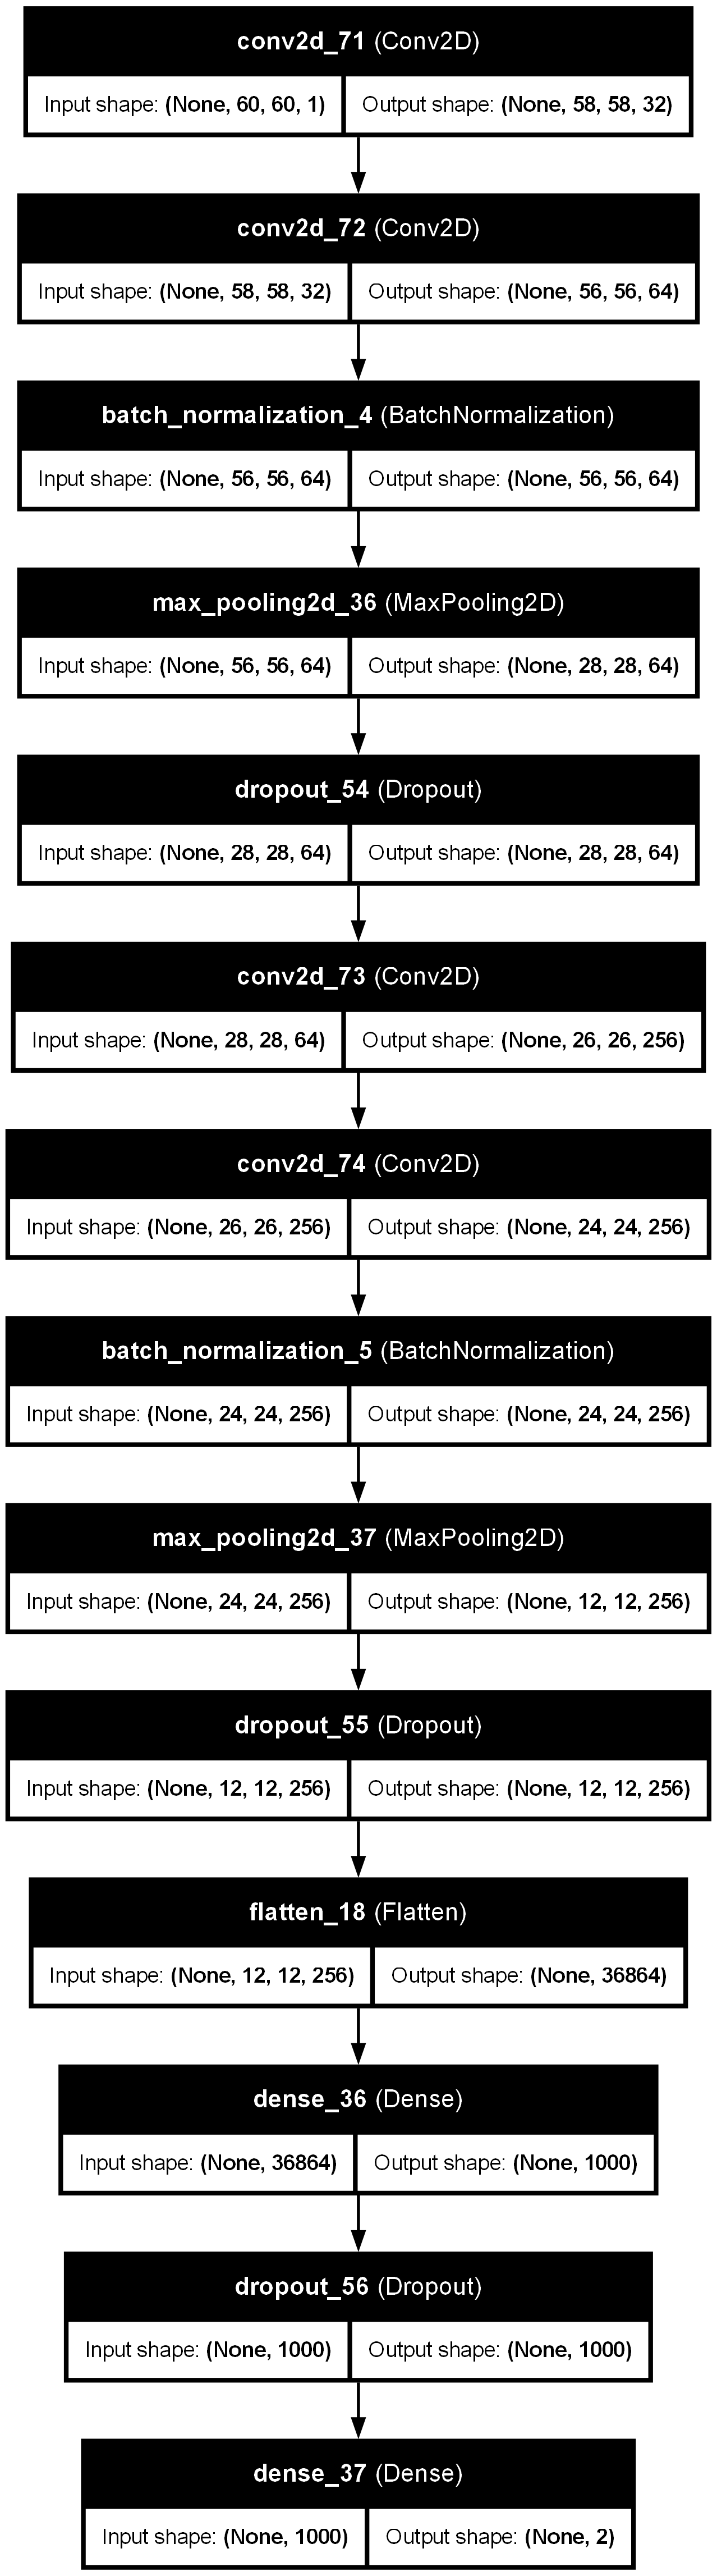

In [223]:
plot_model(model,to_file="ab.png",show_layer_names=True,show_shapes=True)

Here we training the  model on the training set and evaluating it on the validation set. We use the Adam optimizer with a
learning rate of 0.001 and a batch size of 32. We also use the categorical
cross-entropy loss function.

In [225]:
model.fit(train_data,epochs=7)

Epoch 1/7
34/34 ━━━━━━━━━━━━━━━━━━━━ 31s 919ms/step - accuracy: 0.9328 - loss: 2.2724
Epoch 2/7
34/34 ━━━━━━━━━━━━━━━━━━━━ 67s 2s/step - accuracy: 0.9398 - loss: 2.0639
Epoch 3/7
34/34 ━━━━━━━━━━━━━━━━━━━━ 32s 926ms/step - accuracy: 0.9551 - loss: 1.8084
Epoch 4/7
34/34 ━━━━━━━━━━━━━━━━━━━━ 32s 943ms/step - accuracy: 0.9626 - loss: 1.6423
Epoch 5/7
34/34 ━━━━━━━━━━━━━━━━━━━━ 32s 933ms/step - accuracy: 0.9615 - loss: 1.4837
Epoch 6/7
34/34 ━━━━━━━━━━━━━━━━━━━━ 32s 933ms/step - accuracy: 0.9640 - loss: 1.3715
Epoch 7/7
34/34 ━━━━━━━━━━━━━━━━━━━━ 32s 946ms/step - accuracy: 0.9580 - loss: 1.2859


In [226]:
model.predict(test_data)

12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 274ms/step


array([[6.2058526e-01, 3.1781670e-01],
       [2.0435631e-01, 7.2245049e-01],
       [4.9471243e-11, 1.0000000e+00],
       ...,
       [5.5201241e-07, 9.9999923e-01],
       [9.9827564e-01, 2.9960705e-03],
       [9.9998534e-01, 3.4832396e-05]], dtype=float32)

Here we display the images with the predictions for taking the batch  of images through the model. We use the `imshow` function from the `matplotlib.pyplot` module

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step


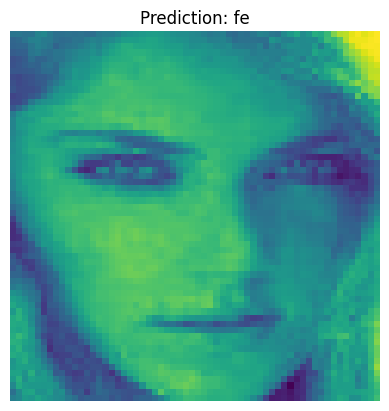

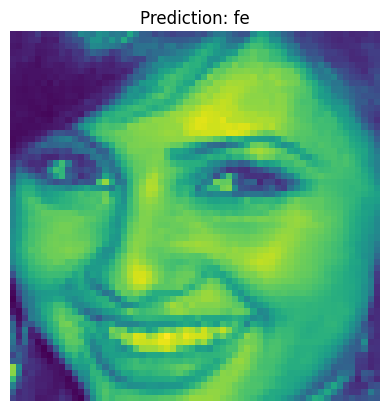

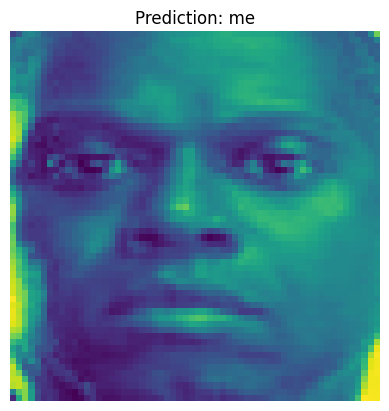

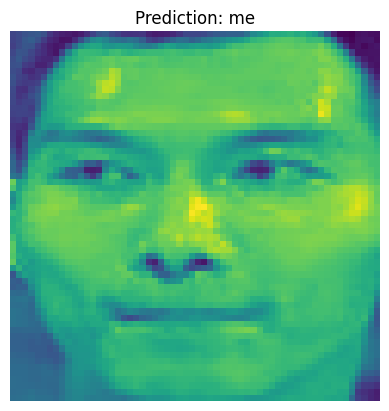

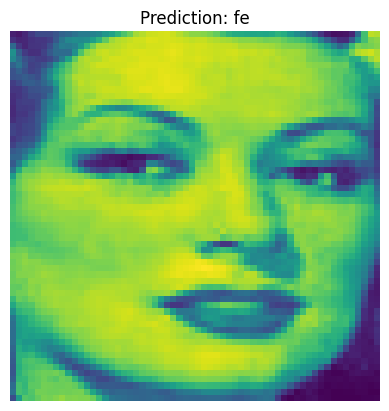

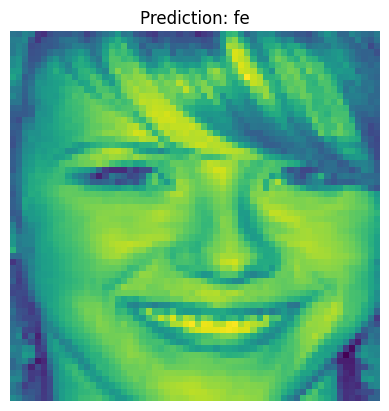

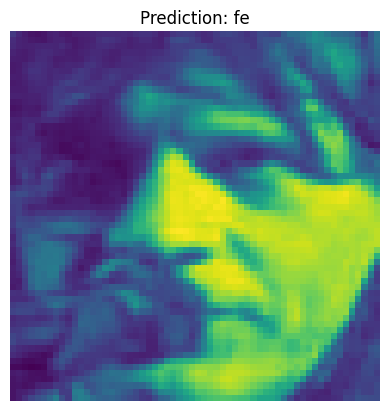

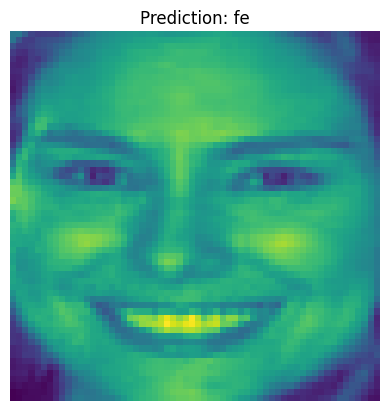

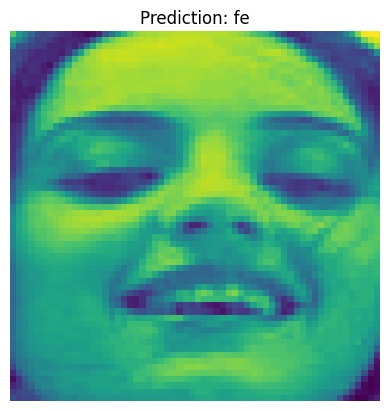

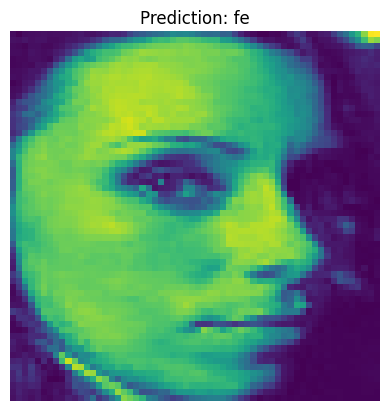

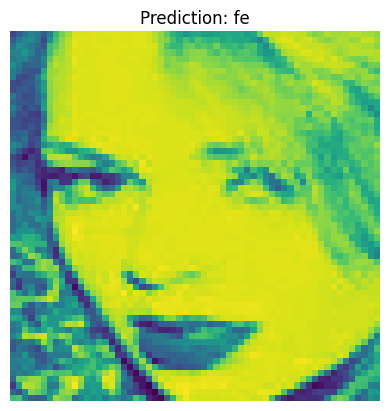

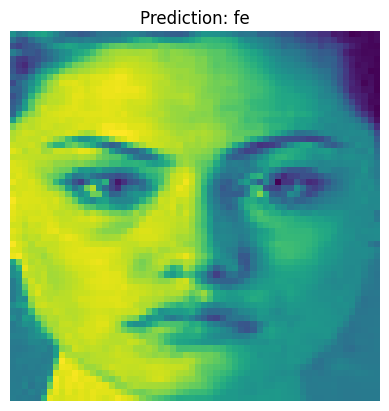

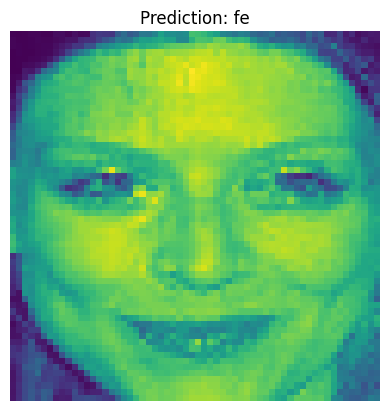

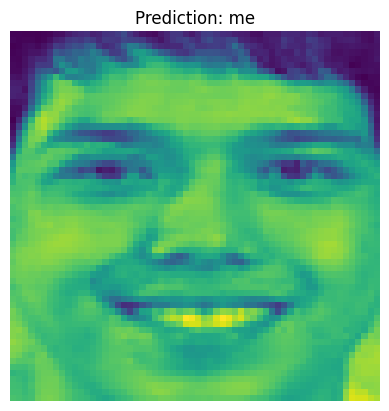

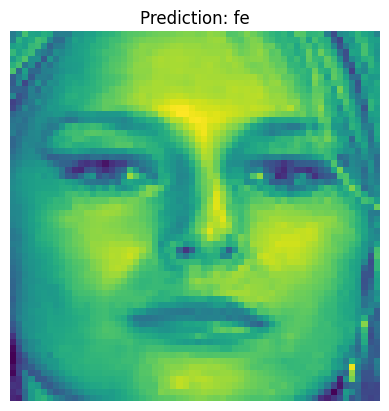

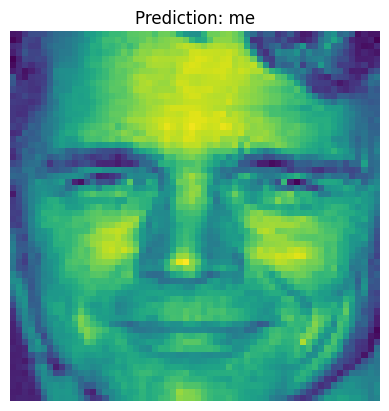

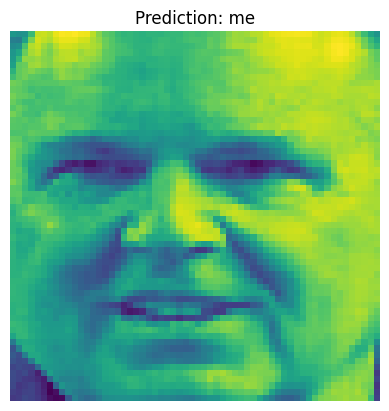

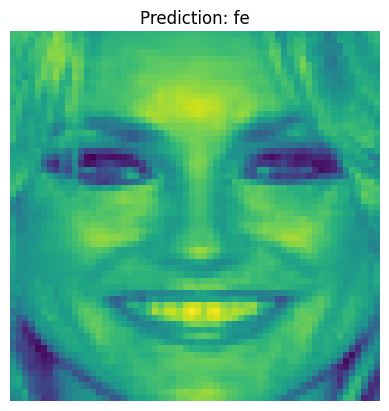

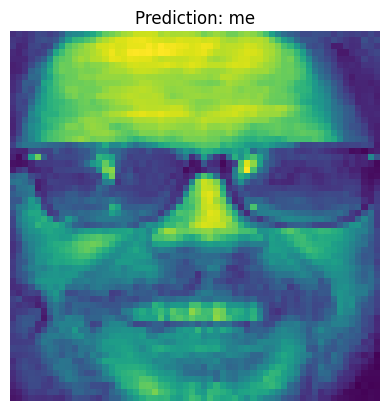

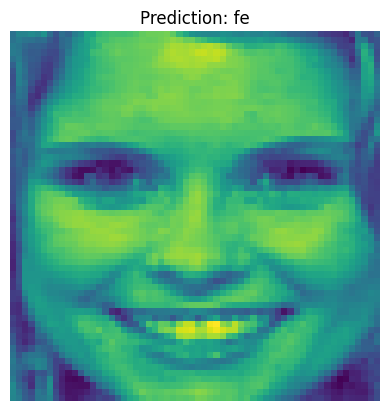

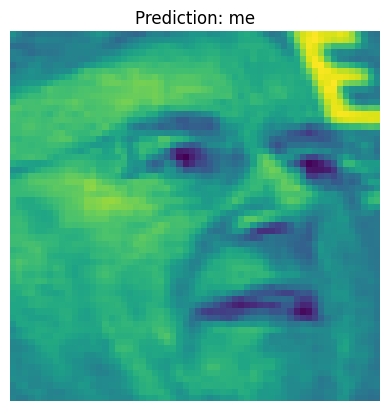

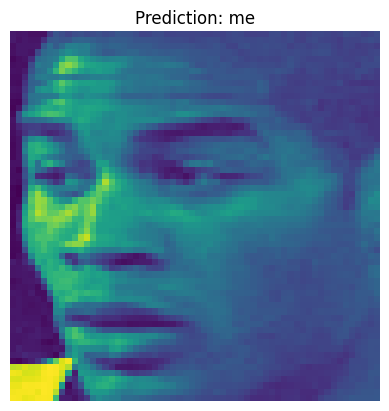

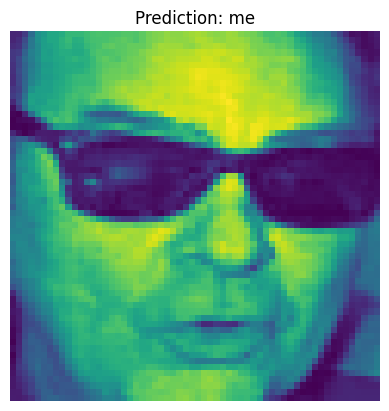

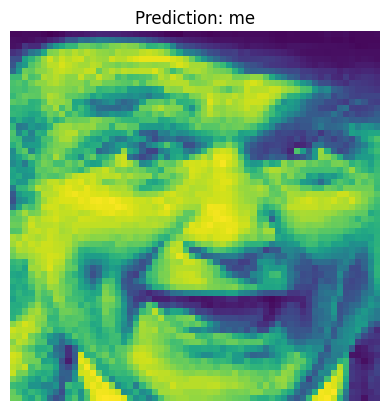

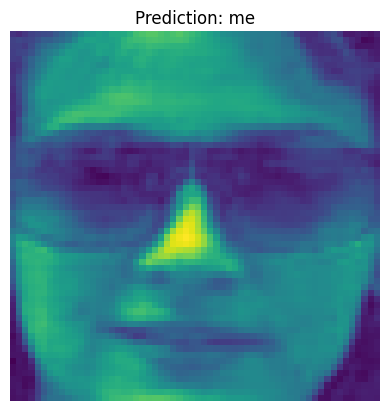

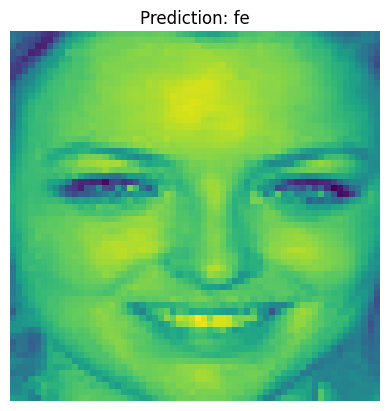

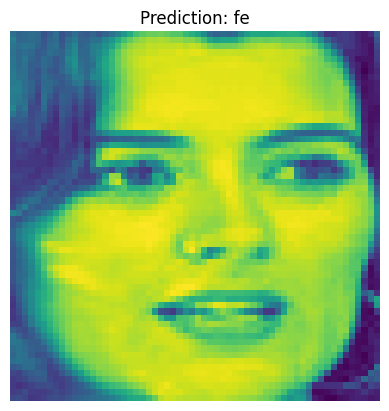

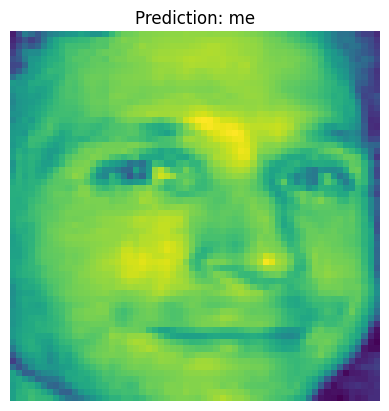

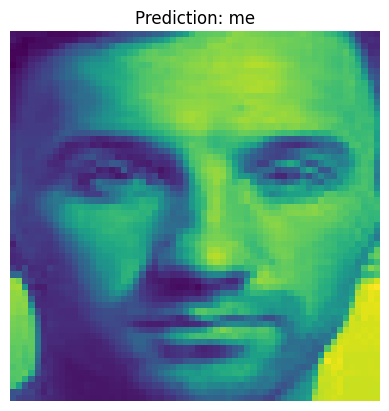

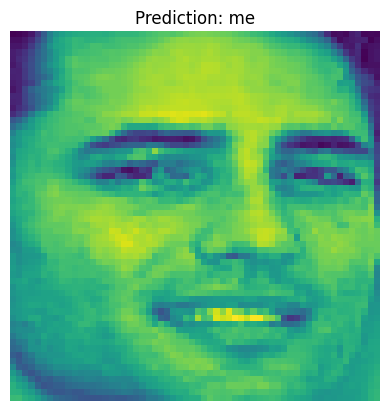

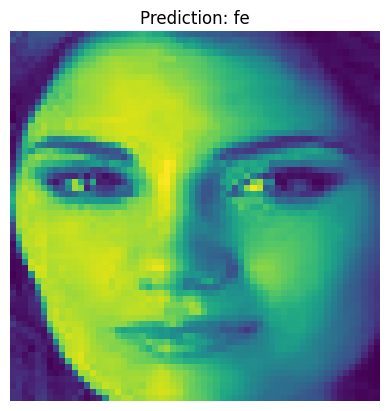

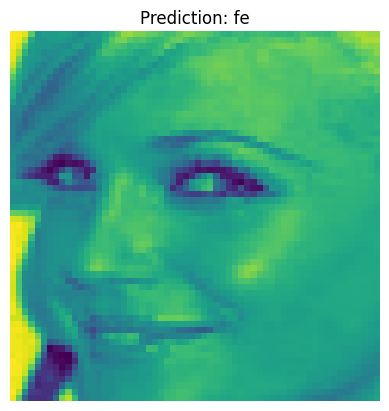

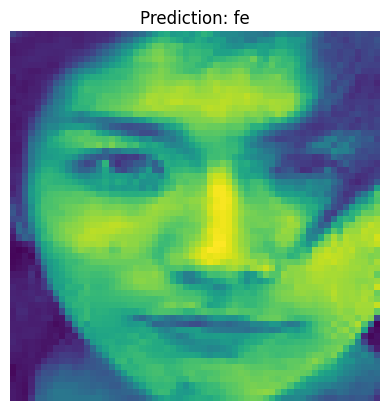

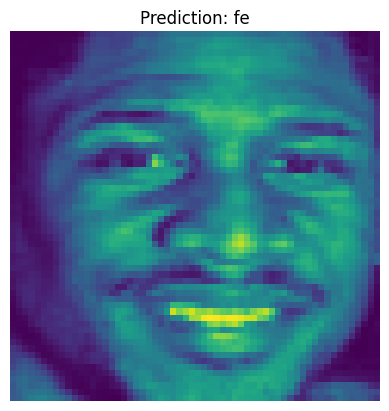

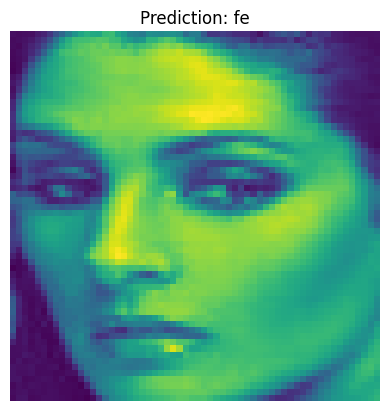

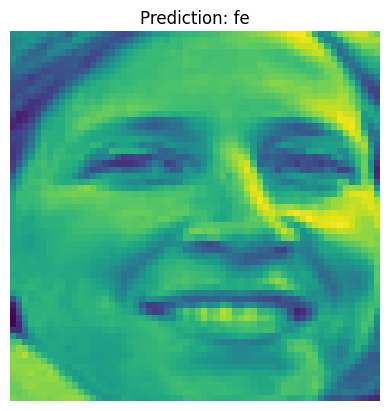

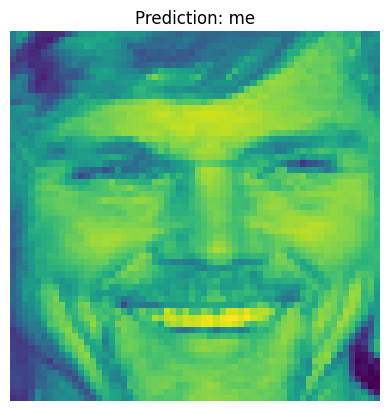

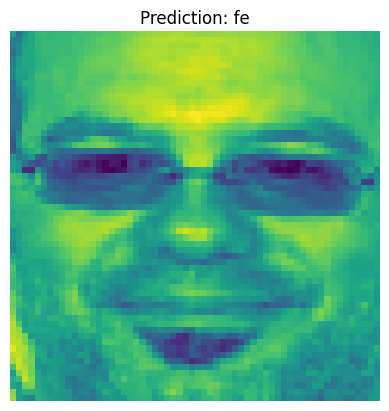

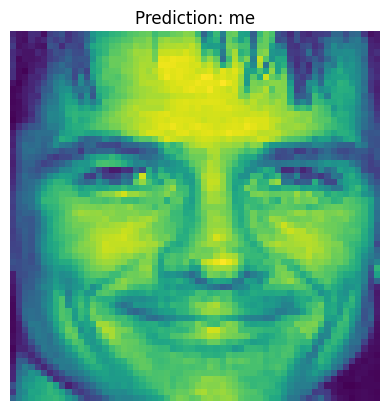

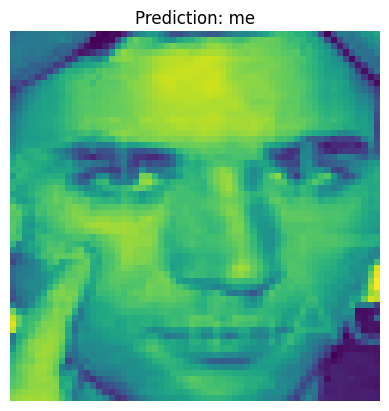

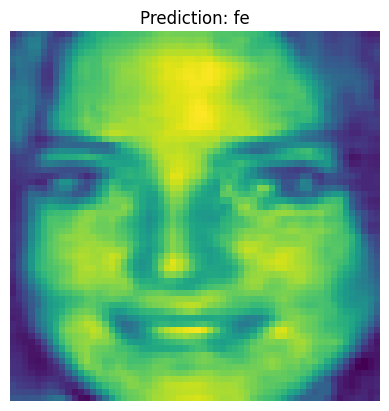

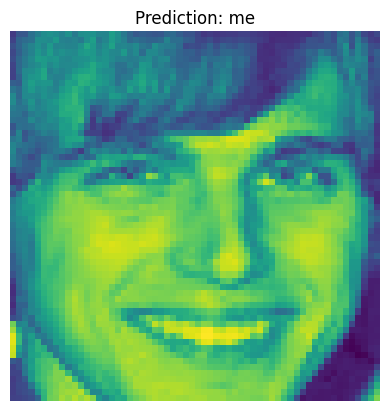

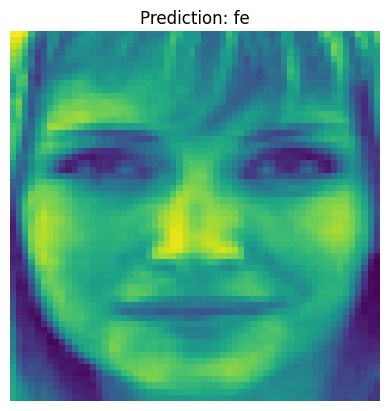

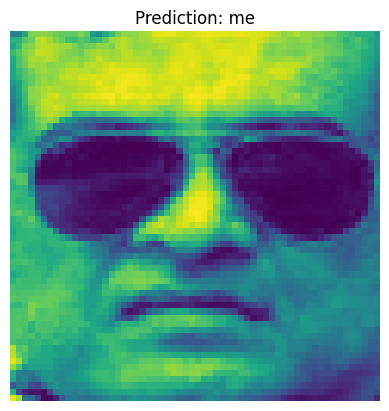

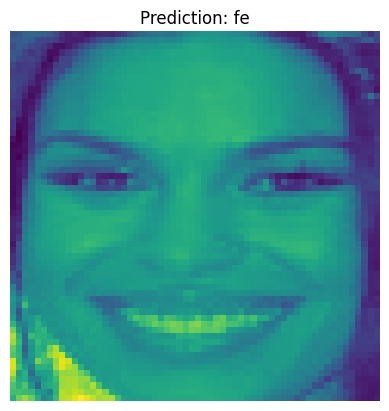

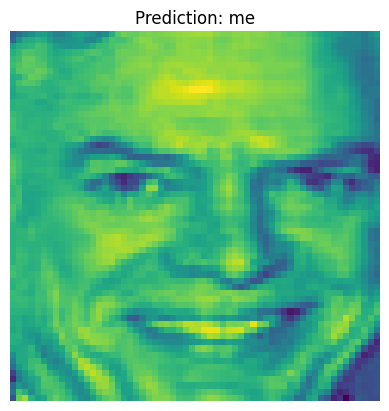

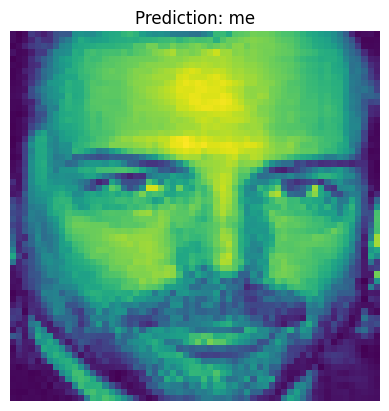

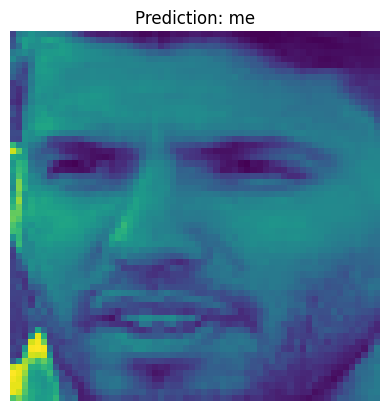

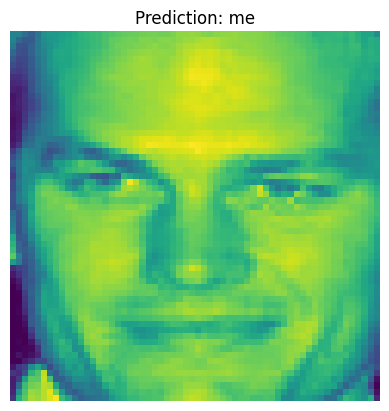

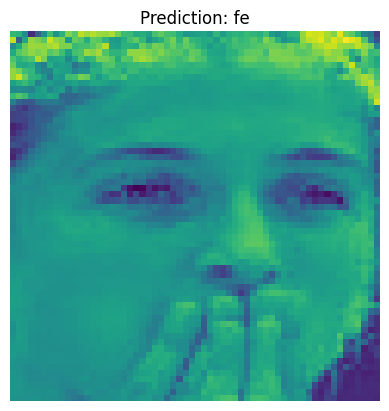

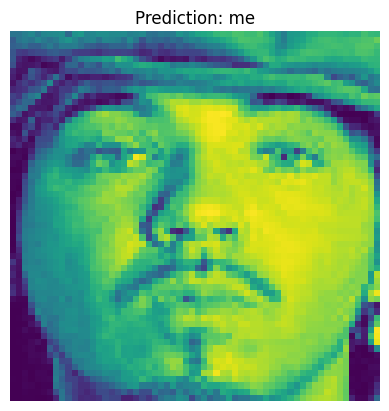

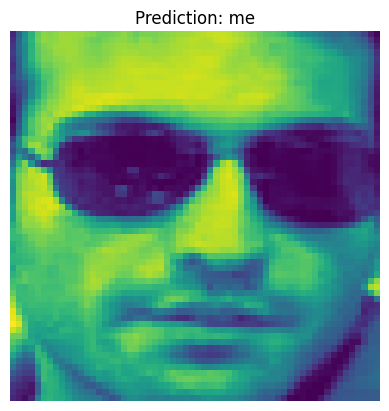

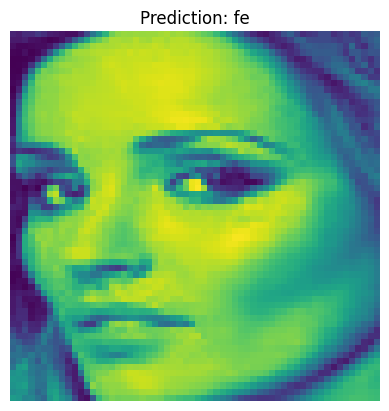

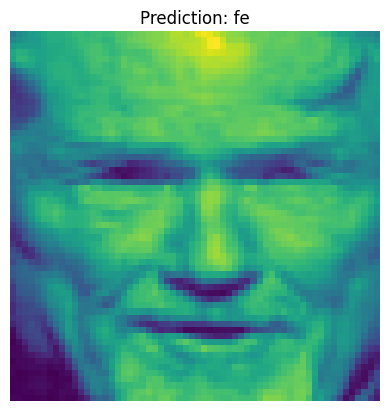

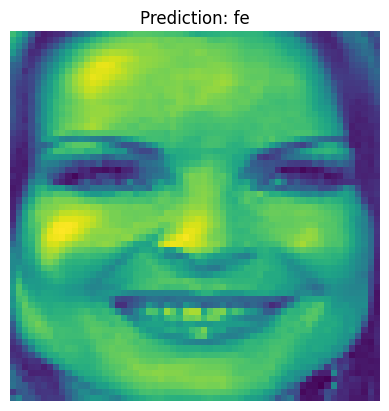

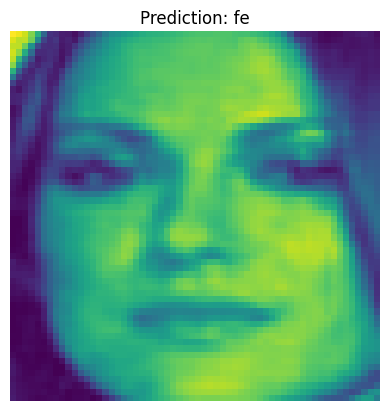

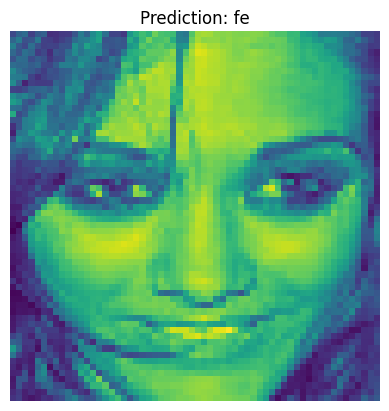

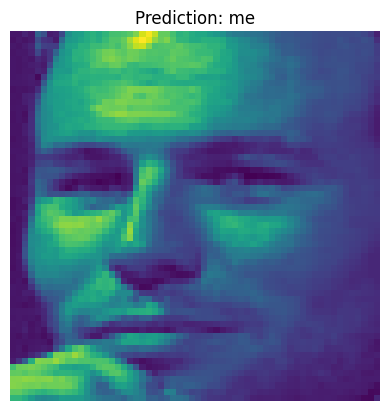

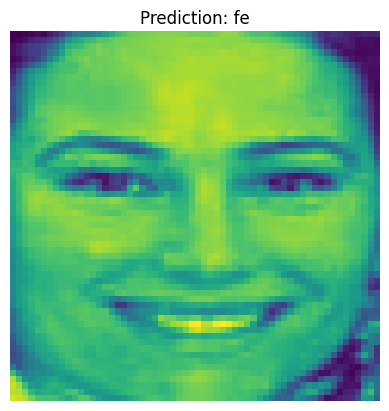

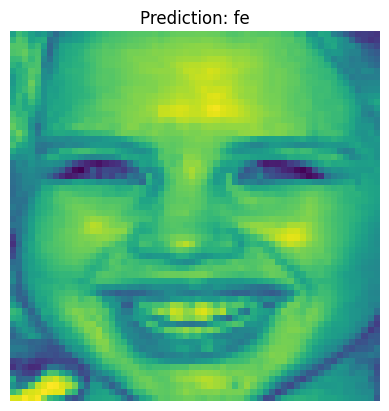

In [228]:
import numpy as np
import matplotlib.pyplot as plt
class_names = classes

# Function to display an image and the predicted label
def display_prediction(image, prediction):
    plt.imshow(image / 255.0)  # Normalize pixel values for display
    plt.title(f"Prediction: {class_names[np.argmax(prediction)]}")
    plt.axis('off')
    plt.show()

# %% Predict on test dataset
for images, labels in test_data.take(1):  # Get a batch from the test dataset
    predictions = model.predict(images)
    for i in range(len(images)):
        display_prediction(images[i].numpy(), predictions[i])